#Batch Gradient Descent with early stopping for Softmax Regression

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]

Adding a bias term allows us to shift the activation function to the left or right for better learning. Refer to <a href="https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks">Stack Overflow</a>

In [ ]:
import numpy as np

X_with_bias = np.c_[np.ones([len(X), 1]), X]
np.random.seed(2042)

Train test split

In [ ]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_val = X_with_bias[rnd_indices[train_size:-test_size]]
y_val = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

Softmax relies on target class probabilities to train the Softmax model. We one hot encode the target class so that we can have only the target being 1 and the others being 0.

In [ ]:
def to_one_hot(y):
  n_classes = y.max() + 1
  m = len(y)
  Y_one_hot = np.zeros((m, n_classes))
  Y_one_hot[np.arange(m), y] = 1
  return Y_one_hot

In [ ]:
y_train_one_hot = to_one_hot(y_train)
y_valid_one_hot = to_one_hot(y_val)
y_test_one_hot = to_one_hot(y_test)

Softmax function:
$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [ ]:
def softmax(logits):
  exps = np.exp(logits)
  exp_sums = np.sum(exps, axis=1, keepdims=True)
  return exps / exp_sums

In [ ]:
n_inputs = X_train.shape[1] # 2 features plus bias term
n_outputs = len(np.unique(y_train))

Cost function: $J(\mathbf{\Theta}) = \dfrac{1}{m}\sum\limits{i=1}^{m}\sum\limits{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$
<br>
Gradient vector: $\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

In [ ]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
losses = {}
Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
  logits = X_train.dot(Theta)
  y_proba = softmax(logits)
  if iteration % 250 == 0:
    loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
    losses[iteration] = loss
  error = y_proba - y_train_one_hot
  gradients = 1/m * X_train.T.dot(error)
  Theta = Theta - eta * gradients

In [ ]:
list(losses.values())

[5.446205811872683,
 0.9497305578157159,
 0.8350062641405651,
 0.7508456905160091,
 0.6878801447192402,
 0.6394870597490927,
 0.6012379137693314,
 0.5702084021586887,
 0.5444496861981872,
 0.5226379254157998,
 0.5038530181431525,
 0.48744022251062674,
 0.47292289721922487,
 0.45994657961690627,
 0.44824244188957774,
 0.4376029170471293,
 0.42786510939287936,
 0.4188992812918585,
 0.41060071429187134,
 0.40288385526869575,
 0.3956780375390374]

Text(0, 0.5, 'Loss')

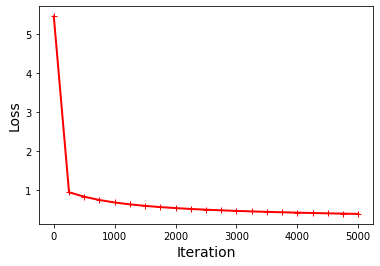

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(losses.keys()), list(losses.values()), "r-+", linewidth=2, label="train")
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Loss", fontsize=14)

In [ ]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [ ]:
logits = X_val.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)
accuracy_score = np.mean(y_predict == y_val)
accuracy_score

0.9666666666666667

In [ ]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

Adding $\ell_2$  norm for regularization

In [ ]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
losses = {}

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    y_proba = softmax(logits)
    if iteration % 250 == 0:
      xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
      l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
      loss = xentropy_loss + alpha * l2_loss
      losses[iteration] = loss
    error = y_proba - y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

Text(0, 0.5, 'Loss')

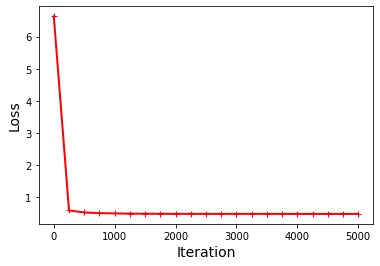

In [ ]:
plt.plot(list(losses.keys()), list(losses.values()), "r-+", linewidth=2, label="train")
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Loss", fontsize=14)

In [ ]:
logits = X_val.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)
accuracy_score = np.mean(y_predict == y_val)
accuracy_score

1.0

In [ ]:
# Adding early stopping
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty
best_iter = 0
train_losses = {}
val_losses = {}
patience = 5
patience_count = 0

Theta = np.random.randn(n_inputs, n_outputs)

def set_model_details(iters, best_iter, loss, patience, t_losses, v_losses):
  details = {}
  details["Iteration"] = iters
  details["Best Iteration"] = best_iter
  details["Loss"] = loss
  details["Patience"] = patience
  details["Training Loss Values per 250 iters"] = t_losses
  details["Validation Loss Values per 250 iters"] = v_losses
  return details

for iteration in range(n_iterations):
  # Train 
  logits = X_train.dot(Theta)
  y_proba = softmax(logits)
  xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
  l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
  loss = xentropy_loss + alpha * l2_loss
  if iteration % 250 == 0:
    train_losses[iteration] = loss
  error = y_proba - y_train_one_hot
  gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
  Theta = Theta - eta * gradients

  # validation
  logits = X_val.dot(Theta)
  Y_proba = softmax(logits)
  xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
  l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
  loss = xentropy_loss + alpha * l2_loss
  if iteration % 250 == 0:
    val_losses[iteration] = loss
  if loss < best_loss:
    best_loss = loss
    best_iter = iteration
  else:
    if patience_count > patience:
      details = set_model_details(iteration, best_iter, loss, patience,
                                  train_losses, val_losses)
      break
    else:
      patience_count += 1
  details = set_model_details(iteration, best_iter, loss, patience,
                                  train_losses, val_losses)   

In [ ]:
details

{'Best Iteration': 5000,
 'Iteration': 5000,
 'Loss': 0.48884398809168583,
 'Patience': 5,
 'Training Loss Values per 250 iters': {0: 2.6090601873251216,
  250: 0.6252097523540127,
  500: 0.5422546812386668,
  750: 0.5173517476290375,
  1000: 0.5056588586071499,
  1250: 0.49921794169277695,
  1500: 0.4954070928004687,
  1750: 0.49306239803823365,
  2000: 0.49158390059930845,
  2250: 0.49063582728408195,
  2500: 0.49002050572727307,
  2750: 0.4896175510288207,
  3000: 0.4893518628715172,
  3250: 0.4891757547220872,
  3500: 0.48905854006003713,
  3750: 0.48898026834224717,
  4000: 0.4889278648370402,
  4250: 0.4888927068260658,
  4500: 0.4888690791760023,
  4750: 0.4888531787310906,
  5000: 0.4888424665246303},
 'Validation Loss Values per 250 iters': {0: 2.5912343407255505,
  250: 0.6251797268806266,
  500: 0.5423249588542545,
  750: 0.5174042750700343,
  1000: 0.5056980362522094,
  1250: 0.4992484242844276,
  1500: 0.49543143783420146,
  1750: 0.4930821107388438,
  2000: 0.491599975533

Text(0, 0.5, 'Loss')

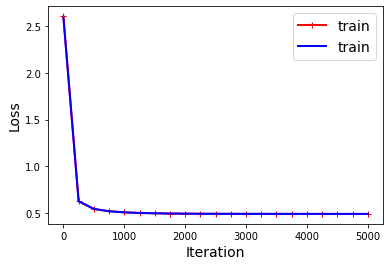

In [ ]:
plt.plot(list(train_losses.keys()), list(train_losses.values()), "r-+", linewidth=2, label="train")
plt.plot(list(val_losses.keys()), list(val_losses.values()), "b-", linewidth=2, label="train")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Loss", fontsize=14)

In [ ]:
logits = X_val.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

1.0

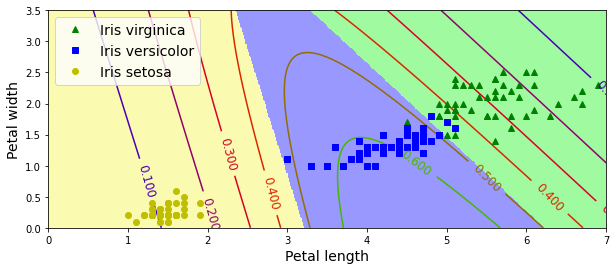

In [ ]:
from matplotlib.colors import ListedColormap
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [ ]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333